In [1]:
# Install xgboost if not already installed
%pip install xgboost

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import f1_score, fbeta_score, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Loading Dataset
df = pd.read_csv("weather.csv")
print("dataset loaded successfully")

dataset loaded successfully


In [3]:
print("\nfirst 5 rows")
df.head()


first 5 rows


,timestamp,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
0,2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
1,2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2,2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
3,2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
4,2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5


In [4]:
df.shape

(331166, 10)

In [5]:
df.columns

Index(['timestamp', 'site_id', 'airTemperature', 'cloudCoverage',
       'dewTemperature', 'precipDepth1HR', 'precipDepth6HR', 'seaLvlPressure',
       'windDirection', 'windSpeed'],
      dtype='object')

In [6]:
df.describe()

,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
count,331038.000000,160179.000000,330838.000000,197980.000000,18162.000000,309542.000000,318161.000000,330592.000000
mean,14.235343,1.920907,7.649370,0.955738,13.536560,1016.063498,184.391299,3.569554
std,9.990392,2.550744,9.201438,8.273852,43.801017,8.052463,111.571354,2.335197
min,-28.900000,0.000000,-35.000000,-1.000000,-1.000000,968.200000,0.000000,0.000000
25%,7.800000,0.000000,1.800000,0.000000,0.000000,1011.600000,90.000000,2.100000
50%,14.400000,0.000000,8.500000,0.000000,0.000000,1016.200000,200.000000,3.100000
75%,21.100000,4.000000,13.900000,0.000000,5.000000,1020.900000,280.000000,5.000000
max,48.300000,9.000000,26.700000,597.000000,770.000000,1050.100000,360.000000,24.200000


In [7]:
df.isnull().sum()

timestamp              0
site_id                0
airTemperature       128
cloudCoverage     170987
dewTemperature       328
precipDepth1HR    133186
precipDepth6HR    313004
seaLvlPressure     21624
windDirection      13005
windSpeed            574
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331166 entries, 0 to 331165
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       331166 non-null  object 
 1   site_id         331166 non-null  object 
 2   airTemperature  331038 non-null  float64
 3   cloudCoverage   160179 non-null  float64
 4   dewTemperature  330838 non-null  float64
 5   precipDepth1HR  197980 non-null  float64
 6   precipDepth6HR  18162 non-null   float64
 7   seaLvlPressure  309542 non-null  float64
 8   windDirection   318161 non-null  float64
 9   windSpeed       330592 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.3+ MB


In [9]:
df.nunique()

timestamp         17544
site_id              19
airTemperature      646
cloudCoverage        10
dewTemperature      553
precipDepth1HR      167
precipDepth6HR      168
seaLvlPressure      756
windDirection        59
windSpeed            73
dtype: int64

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
331161    False
331162    False
331163    False
331164    False
331165    False
Length: 331166, dtype: bool

In [11]:
#Check missing values
print("\nmissing values")
print(df.isnull().sum())


missing values
timestamp              0
site_id                0
airTemperature       128
cloudCoverage     170987
dewTemperature       328
precipDepth1HR    133186
precipDepth6HR    313004
seaLvlPressure     21624
windDirection      13005
windSpeed            574
dtype: int64


In [12]:
#Handle missing values
#Fill numerical columns with mean, categorical data with mode
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\nmissing values data handling")
print(df.isnull().sum())

C:\Users\user\AppData\Local\Temp\ipykernel_13608\3674745479.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13608\3674745479.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 


missing values data handling
timestamp         0
site_id           0
airTemperature    0
cloudCoverage     0
dewTemperature    0
precipDepth1HR    0
precipDepth6HR    0
seaLvlPressure    0
windDirection     0
windSpeed         0
dtype: int64


In [13]:
# Convert timestamp to datetime (if not already done)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour

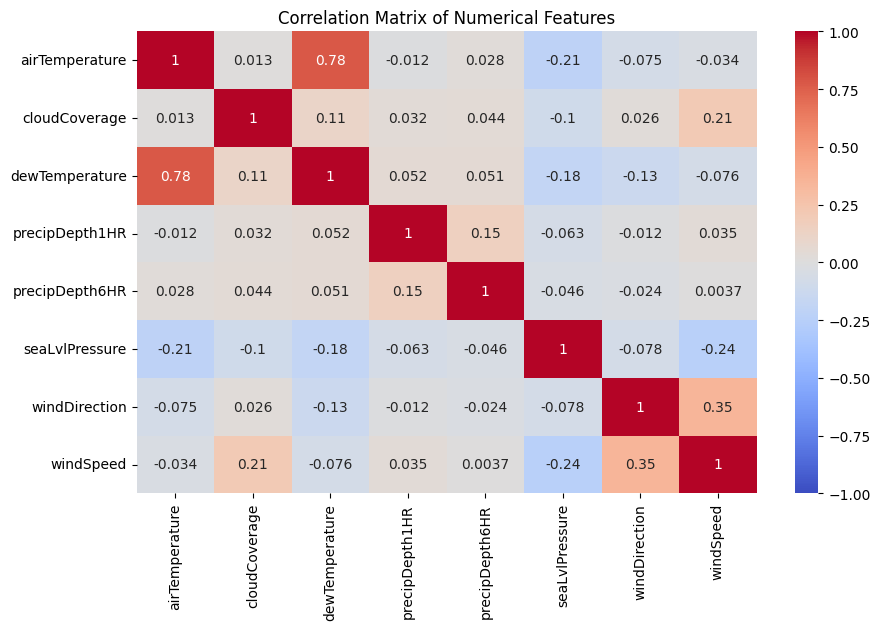

In [14]:
# Correlation Matrix (for numerical columns)
plt.figure(figsize=(10, 6))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix.png')
plt.show()

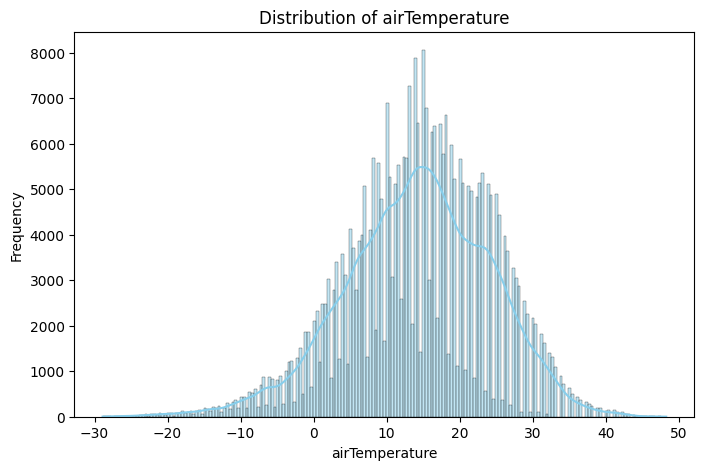

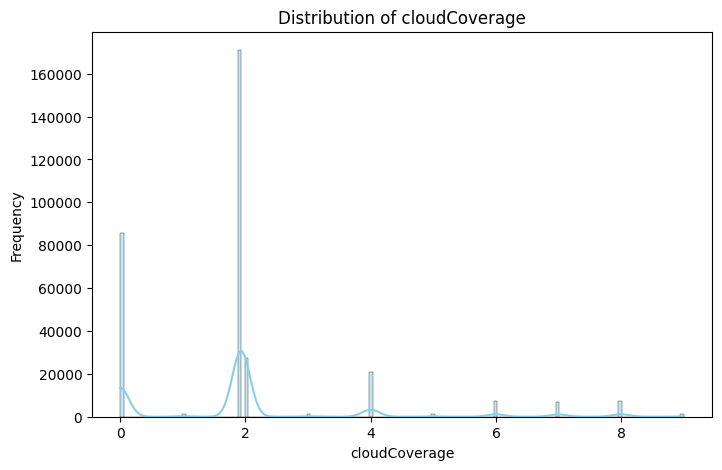

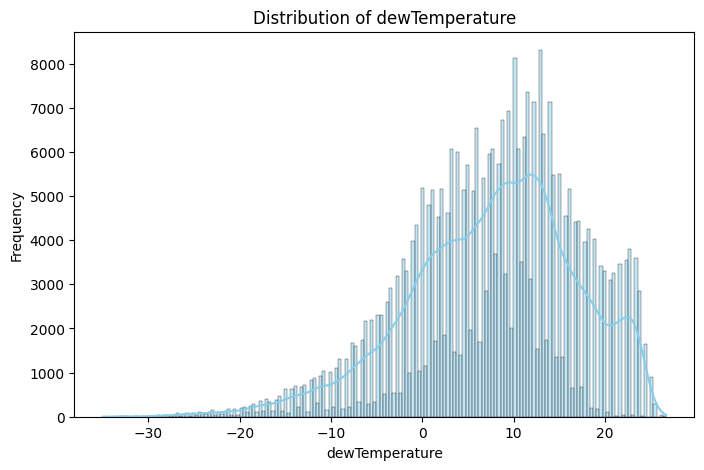

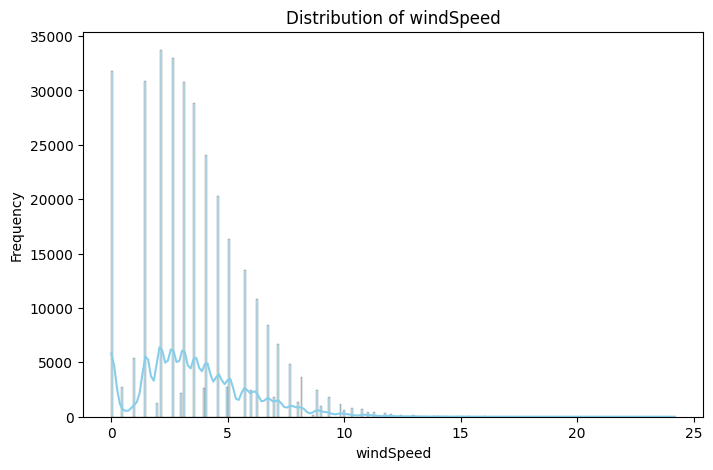

In [15]:
# 6. Distribution of Key Features
key_features = ['airTemperature', 'cloudCoverage', 'dewTemperature', 'windSpeed']
for feature in key_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.savefig(f'distribution_{feature}.png')
        plt.show()

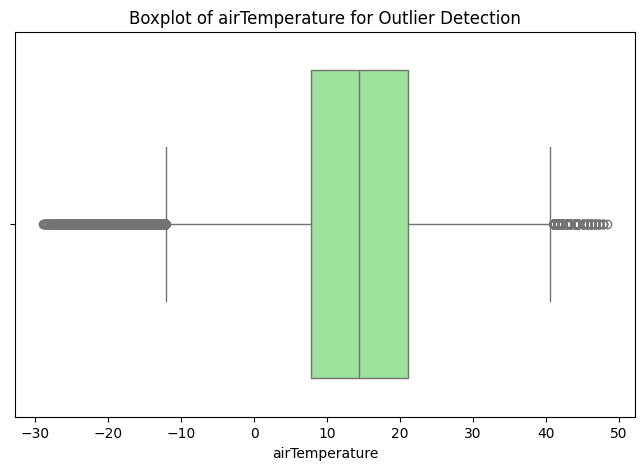

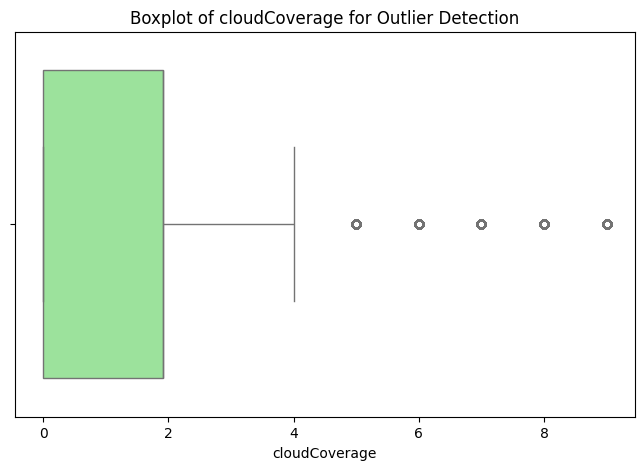

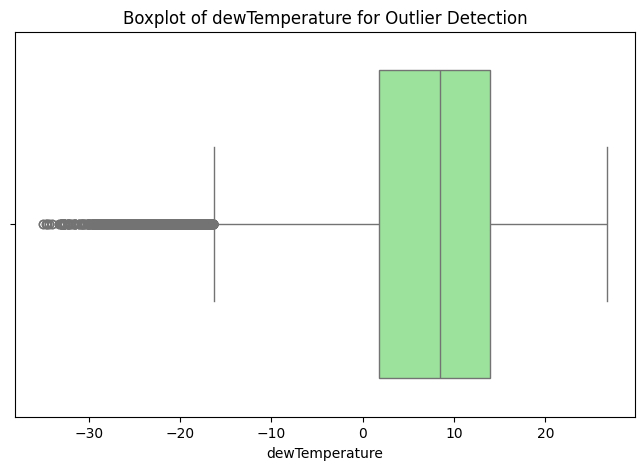

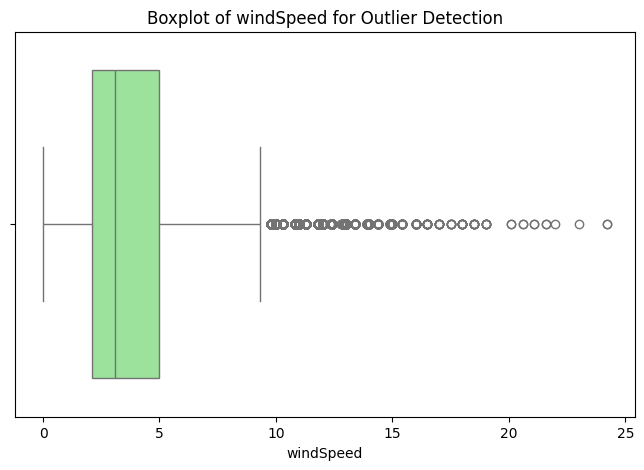

In [16]:
#Boxplots for Outlier Detection
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature} for Outlier Detection')
    plt.xlabel(feature)
    plt.savefig(f'boxplot_{feature}.png')
    plt.show()


Number of Unique Sites: 19


C:\Users\user\AppData\Local\Temp\ipykernel_13608\3233306281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='site_id', data=df, palette='viridis')


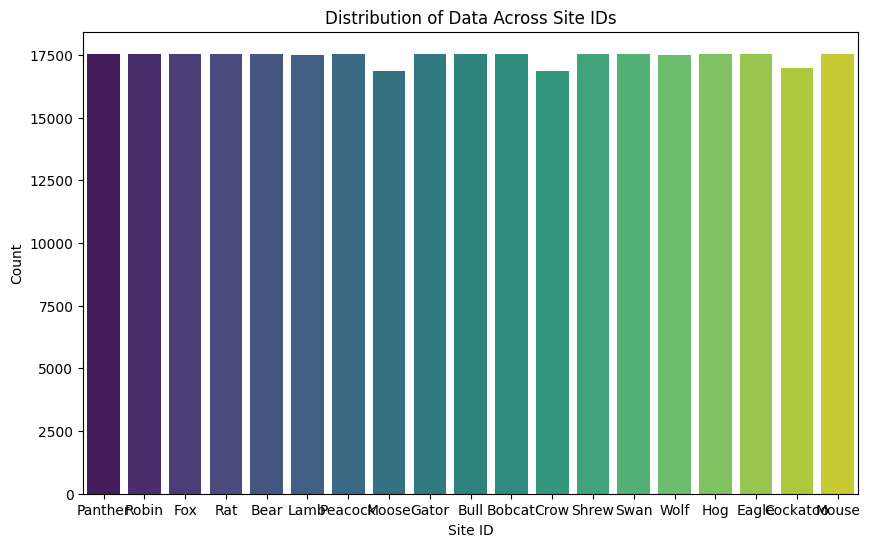

In [17]:
#Site-Specific Analysis
print("\nNumber of Unique Sites:", df['site_id'].nunique())
plt.figure(figsize=(10, 6))
sns.countplot(x='site_id', data=df, palette='viridis')
plt.title('Distribution of Data Across Site IDs')
plt.xlabel('Site ID')
plt.ylabel('Count')
plt.savefig('site_id_distribution.png')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13608\3578484436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='site_id', y=feature, data=df, palette='muted')


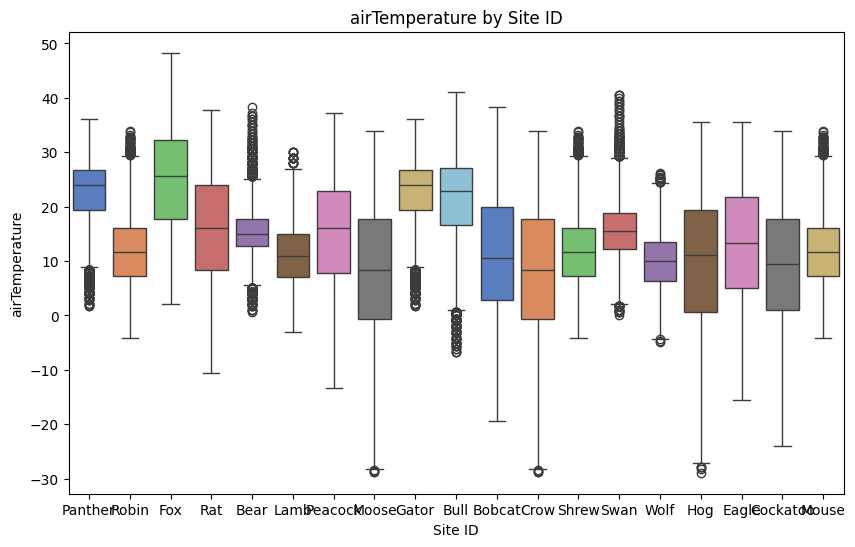

C:\Users\user\AppData\Local\Temp\ipykernel_13608\3578484436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='site_id', y=feature, data=df, palette='muted')


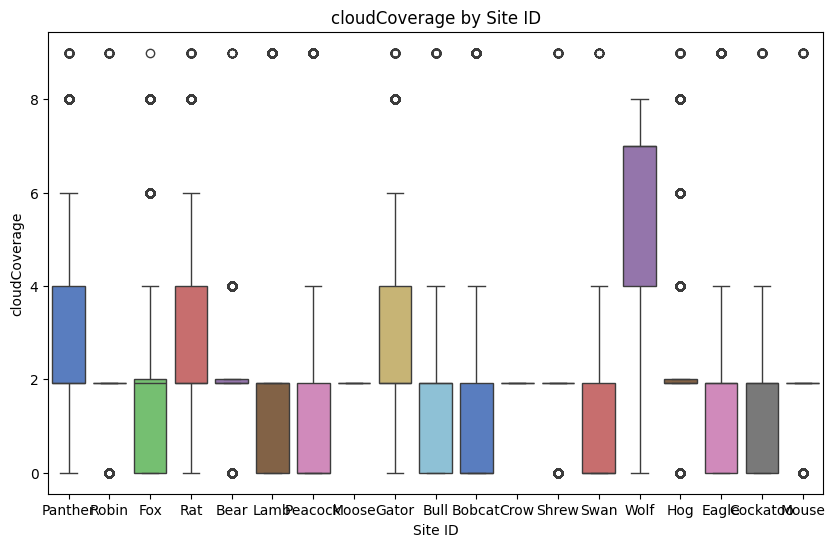

C:\Users\user\AppData\Local\Temp\ipykernel_13608\3578484436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='site_id', y=feature, data=df, palette='muted')


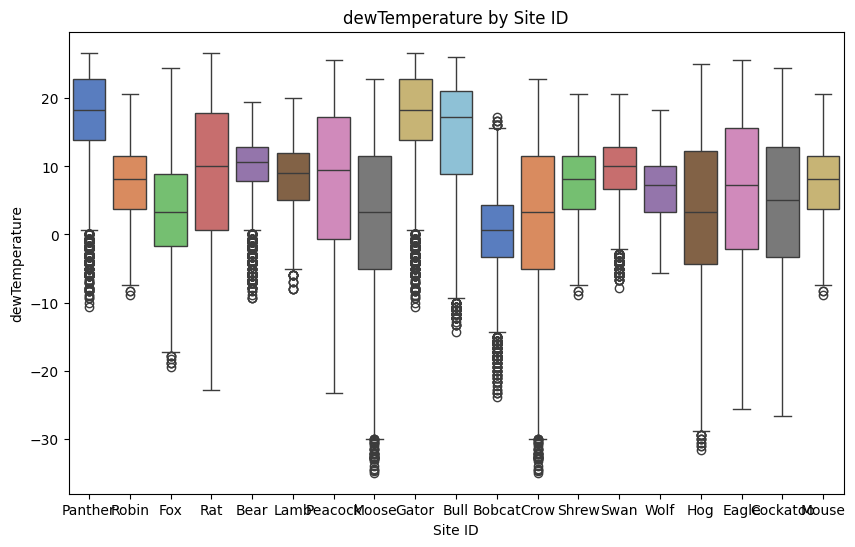

C:\Users\user\AppData\Local\Temp\ipykernel_13608\3578484436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='site_id', y=feature, data=df, palette='muted')


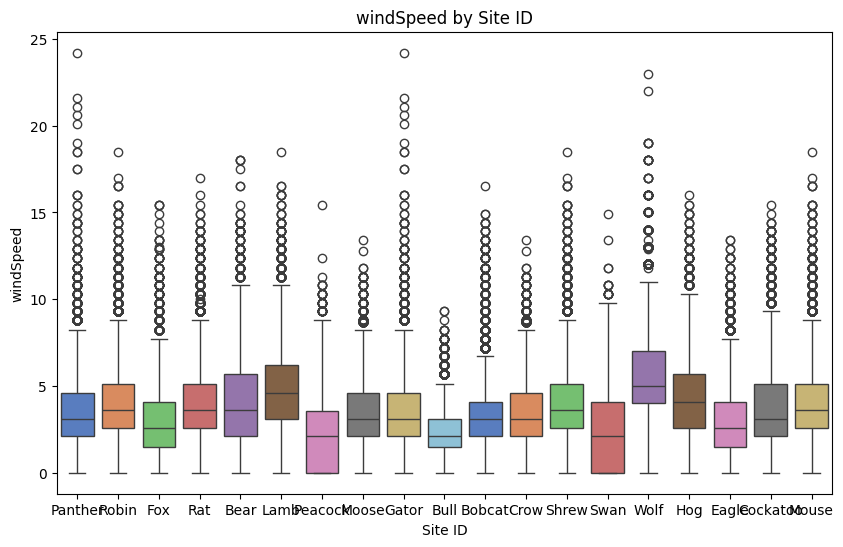

In [18]:
# Feature Variation by Site
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='site_id', y=feature, data=df, palette='muted')
    plt.title(f'{feature} by Site ID')
    plt.xlabel('Site ID')
    plt.ylabel(feature)
    plt.savefig(f'boxplot_{feature}_by_site.png')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13608\4161470031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='cloudCoverage', data=df, palette='cool')


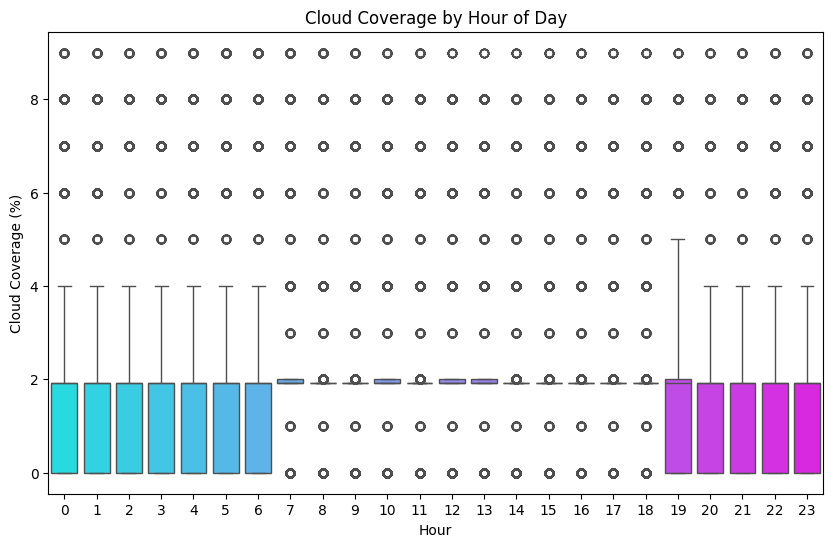

In [19]:
# Temporal Feature Engineering
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='cloudCoverage', data=df, palette='cool')
plt.title('Cloud Coverage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Cloud Coverage (%)')
plt.savefig('cloud_coverage_by_hour.png')
plt.show()# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

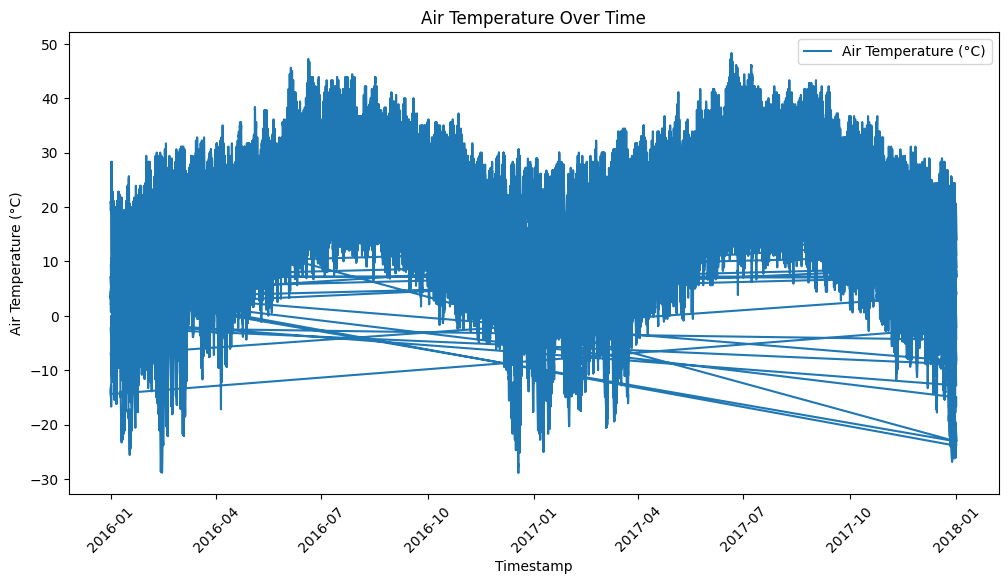

In [20]:
# Time-Based Analysis
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    # Since solar_radiation is not available, plot airTemperature as a proxy
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['airTemperature'], label='Air Temperature (°C)')
    plt.title('Air Temperature Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Air Temperature (°C)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.savefig('temperature_time.png')

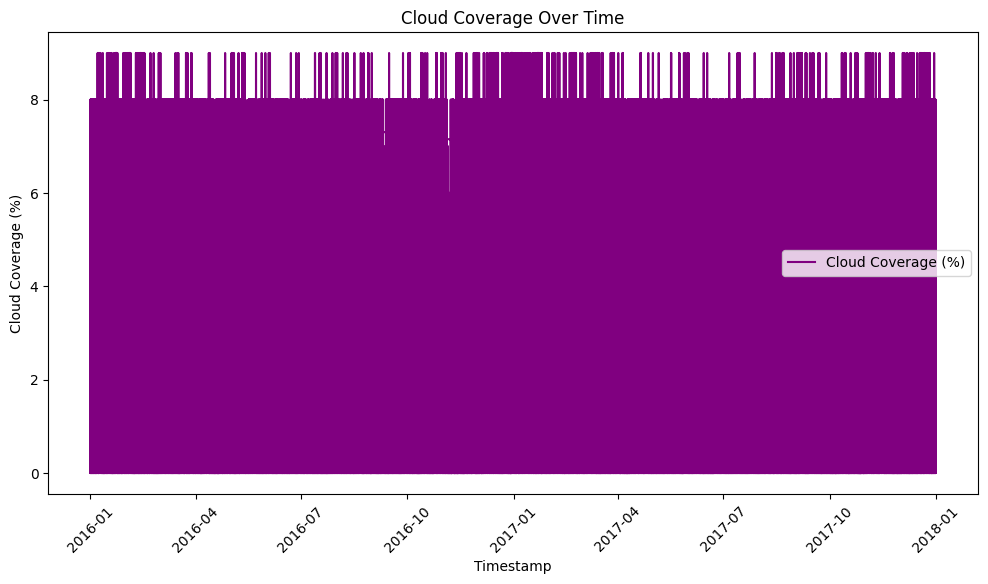

In [21]:
# Time-Series Analysis for Cloud Coverage
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['cloudCoverage'], label='Cloud Coverage (%)', color='purple')
plt.title('Cloud Coverage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Cloud Coverage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('cloud_coverage_time.png')
plt.show()

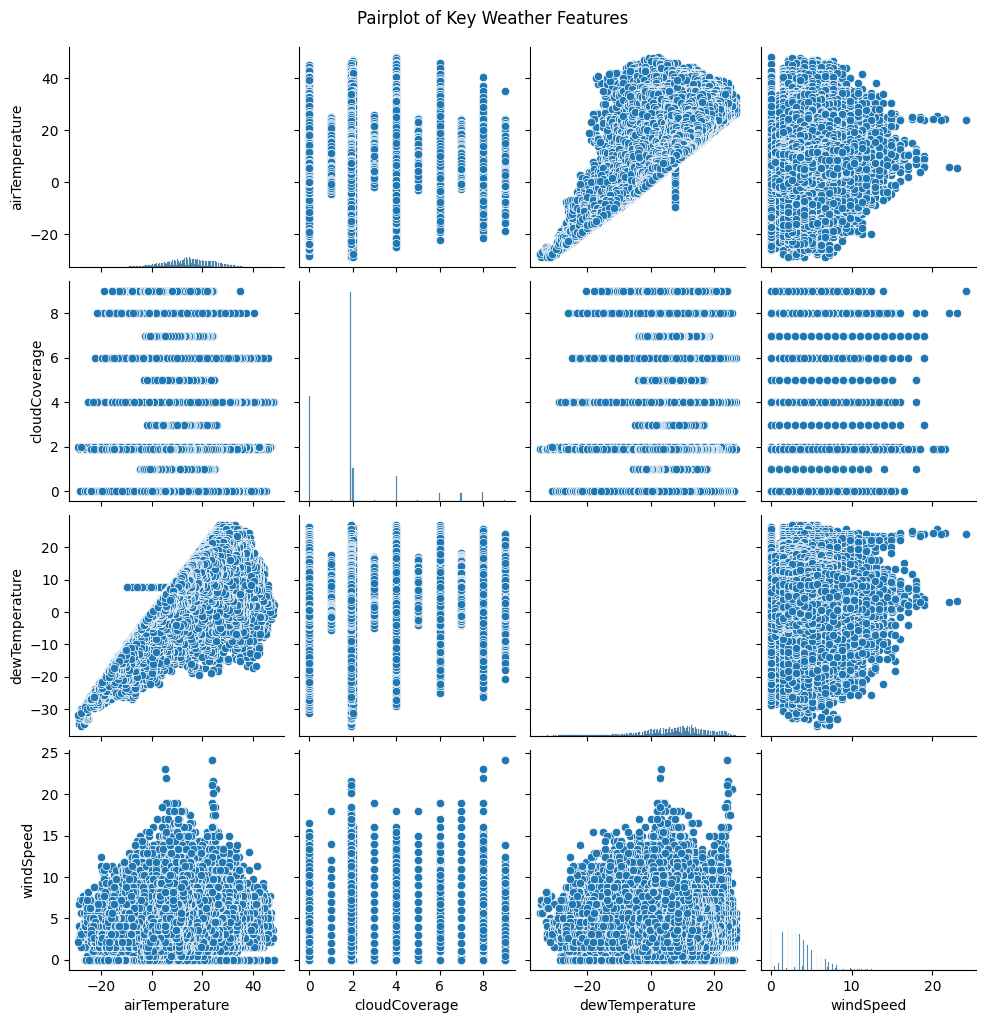

In [22]:
# Pairplot for Key Features
sns.pairplot(df[key_features])
plt.suptitle('Pairplot of Key Weather Features', y=1.02)
plt.savefig('pairplot_features.png')
plt.show()

In [23]:
# 13. Save Cleaned Dataset
df.to_csv('cleaned_weather.csv', index=False)
print("Cleaned dataset saved as 'cleaned_weather.csv'")

Cleaned dataset saved as 'cleaned_weather.csv'


# Machine Learning


Linear Regression - MAE: 0.0000, MSE: 0.0000, R²: 1.0000
XGBoost - MAE: 0.0000, MSE: 0.0000, R²: 1.0000

Sample Predictions (First 10 Test Samples):
          Actual  Linear Regression   XGBoost
306176  0.980791           0.980791  0.980791
30997   0.980791           0.980791  0.980791
9322    0.960000           0.960000  0.960002
323608  0.980791           0.980791  0.980791
3669    0.980791           0.980791  0.980791
132555  0.980791           0.980791  0.980791
137786  0.980791           0.980791  0.980791
290393  0.980791           0.980791  0.980791
174912  1.000000           1.000000  0.999997
270152  1.000000           1.000000  0.999997

Classification Metrics (Binarized Target):
Linear Regression - F1-score: 1.0000, F2-score: 1.0000
XGBoost - F1-score: 0.5040, F2-score: 0.7175

Confusion Matrix:
Linear Regression:
[[48824     0]
 [    0 17410]]
XGBoost:
[[14557 34267]
 [    0 17410]]

ROC-AUC Score:
Linear Regression: 1.0000
XGBoost: 1.0000


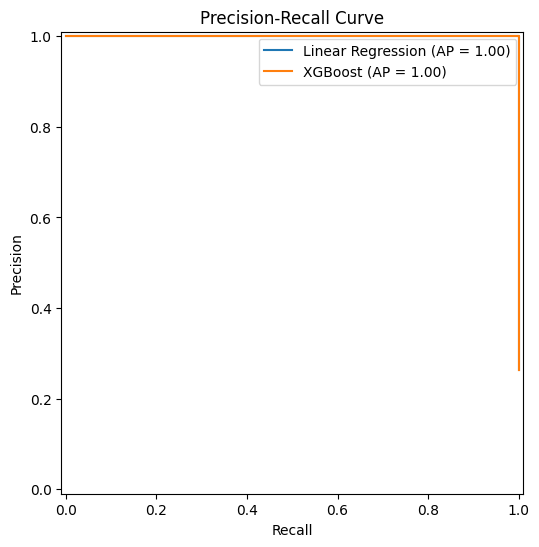

In [24]:
# Derive proxy target (e.g., inverse of cloudCoverage as solar potential)
df['solar_potential'] = 1 - (df['cloudCoverage'] / 100)

# Features and target
features = ['hour', 'cloudCoverage', 'airTemperature', 'windSpeed']
X = df[features]
y = df['solar_potential']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate
lr_mae = mean_absolute_error(y_test, lr_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
lr_r2 = r2_score(y_test, lr_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"Linear Regression - MAE: {lr_mae:.4f}, MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")
print(f"XGBoost - MAE: {xgb_mae:.4f}, MSE: {xgb_mse:.4f}, R²: {xgb_r2:.4f}")

# Predictions
print("\nSample Predictions (First 10 Test Samples):")
predictions_df = pd.DataFrame({'Actual': y_test.head(10), 'Linear Regression': lr_pred[:10], 'XGBoost': xgb_pred[:10]})
print(predictions_df)

# Binarize target (e.g., above median as 1, below as 0)
y_test_binary = (y_test > y_test.median()).astype(int)
lr_pred_binary = (lr_pred > y_test.median()).astype(int)
xgb_pred_binary = (xgb_pred > y_test.median()).astype(int)

# Classification Metrics
lr_f1 = f1_score(y_test_binary, lr_pred_binary)
xgb_f1 = f1_score(y_test_binary, xgb_pred_binary)
lr_f2 = fbeta_score(y_test_binary, lr_pred_binary, beta=2)
xgb_f2 = fbeta_score(y_test_binary, xgb_pred_binary, beta=2)

print(f"\nClassification Metrics (Binarized Target):")
print(f"Linear Regression - F1-score: {lr_f1:.4f}, F2-score: {lr_f2:.4f}")
print(f"XGBoost - F1-score: {xgb_f1:.4f}, F2-score: {xgb_f2:.4f}")

# Confusion Matrix
lr_cm = confusion_matrix(y_test_binary, lr_pred_binary)
xgb_cm = confusion_matrix(y_test_binary, xgb_pred_binary)

print("\nConfusion Matrix:")
print(f"Linear Regression:\n{lr_cm}")
print(f"XGBoost:\n{xgb_cm}")

# ROC-AUC
lr_roc_auc = roc_auc_score(y_test_binary, lr_pred)  # Using raw predictions for probability
xgb_roc_auc = roc_auc_score(y_test_binary, xgb_pred)
print(f"\nROC-AUC Score:")
print(f"Linear Regression: {lr_roc_auc:.4f}")
print(f"XGBoost: {xgb_roc_auc:.4f}")

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
PrecisionRecallDisplay.from_predictions(y_test_binary, lr_pred, name="Linear Regression", ax=plt.gca())
PrecisionRecallDisplay.from_predictions(y_test_binary, xgb_pred, name="XGBoost", ax=plt.gca())
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('precision_recall_curve.png')
plt.show()

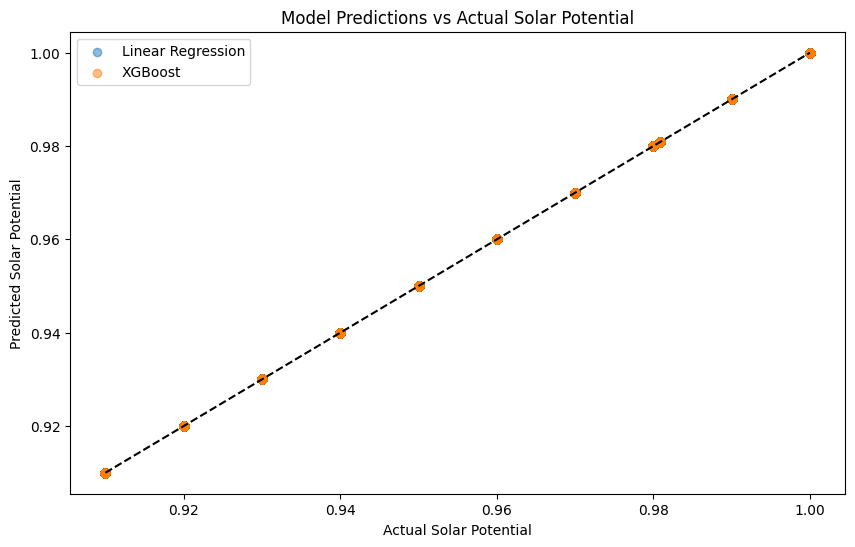

In [25]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, xgb_pred, label='XGBoost', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Solar Potential')
plt.ylabel('Predicted Solar Potential')
plt.title('Model Predictions vs Actual Solar Potential')
plt.legend()
plt.savefig('solar_potential_prediction.png')
plt.show()

# Ethical Reflection

## How might bias in your data affect outcomes?

Bias in your dataset, such as the weather.csv used for predicting solar potential under SDG 7, can significantly impact the outcomes of your machine learning model. Here are some potential issues and their effects:

- **Geographical Bias**: If the data predominantly represents specific regions (e.g., certain site_id values with more samples), the model may overfit to those areas' weather patterns (e.g., consistently low cloudCoverage). This could lead to inaccurate predictions for underrepresented regions, misguiding energy planning where solar potential is overestimated or underestimated.

- **Temporal Bias**: If the dataset covers a limited time period (e.g., mostly clear weather months), the model might fail to generalize to seasonal variations (e.g., rainy seasons with high precipDepth1HR), resulting in poor performance during diverse weather conditions and unreliable energy forecasts.

- **Data Collection Bias**: Inconsistent or incomplete data (e.g., missing timestamp entries or skewed airTemperature readings) could skew predictions. For instance, if sensors malfunctioned during high windSpeed events, the model might underpredict solar potential during stormy conditions, affecting energy reliability.

- **Proxy Target Bias**: Since solar_radiation is derived as 1 - (cloudCoverage / 100), this simplification assumes a direct inverse relationship, which may not hold true across all sites or conditions (e.g., high humidity affecting solar output). This could introduce systematic errors, favoring predictions for clear-sky scenarios and neglecting complex weather interactions.
These biases could lead to inequitable energy solutions, where some regions or times are underserved, potentially exacerbating energy access disparities and undermining SDG 7 goals.

## How does your solution promote fairness and sustainability?

Your solution, a supervised learning model predicting solar potential, can promote fairness and sustainability in the following ways:

- **Fairness**:

 - **Inclusivity Across Sites**: By incorporating site_id and analyzing its impact (e.g., via boxplots in EDA), the model can account for regional differences, ensuring predictions are tailored to diverse locations. This helps avoid favoring well-represented sites and supports equitable energy distribution.

 - **Bias Mitigation**: Regular validation with diverse datasets (e.g., adding data from underrepresented regions) and adjusting for missing values (e.g., mean imputation) can reduce bias, promoting fairer outcomes for all communities.

 - **Transparency**: Sharing the model’s limitations (e.g., proxy target derivation) and metrics (e.g., ROC-AUC, confusion matrix) in your report fosters accountability, allowing stakeholders to address potential inequities.

- **Sustainability**:

 - **Optimized Renewable Energy**: Accurate solar potential forecasts enable efficient use of solar resources, reducing reliance on fossil fuels and supporting long-term environmental sustainability under SDG 7.

 - **Resource Efficiency**: Predicting high-potential periods (e.g., low cloudCoverage at midday) helps optimize energy storage and grid planning, minimizing waste and enhancing renewable energy integration.

 - **Scalable Impact**: The model’s ability to incorporate temporal features (e.g., hour, month) supports sustainable planning across seasons, ensuring consistent clean energy availability and resilience against climate variability.
By addressing bias through data validation and promoting equitable, efficient energy solutions, your project aligns with the ethical and sustainability objectives of the UN SDGs, contributing to a fairer and greener future.